In [2]:
import pandas as pd

df = pd.read_csv("human_dataset.csv")
df.head()

,image,caption,language
0,/kaggle/input/ktvic-dataset/ktvic_dataset/trai...,ba chiếc thuyền đang di chuyển ở trên con sông,vi
1,/kaggle/input/ktvic-dataset/ktvic_dataset/trai...,có ba con thuyền đang di chuyển trên con sông,vi
2,/kaggle/input/ktvic-dataset/ktvic_dataset/trai...,trên dòng sông có ba con thuyền đang di chuyển,vi
3,/kaggle/input/ktvic-dataset/ktvic_dataset/trai...,ba con thuyền đang di chuyển bên một cánh đồng...,vi
4,/kaggle/input/ktvic-dataset/ktvic_dataset/trai...,ba chiếc thuyền đang chuyển động trên một con ...,vi


In [3]:
df.shape

(188739, 3)

In [7]:
df.nunique()

image        55485
caption     172705
language         1
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        plt.style.use('default')
sns.set_palette("husl")

total_images = df['image'].nunique()
total_captions = len(df)


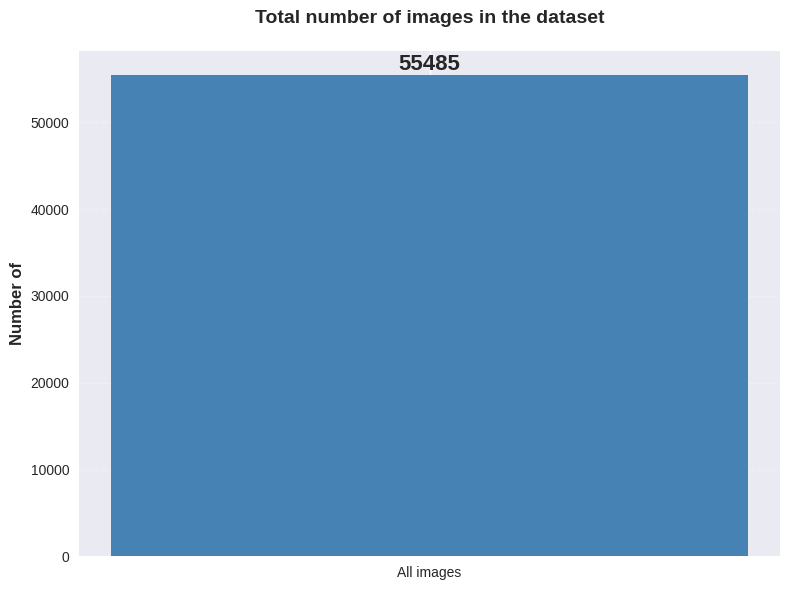

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['All images'], [total_images], color='steelblue', width=0.5)
ax.set_ylabel('Number of', fontsize=12, fontweight='bold')
ax.set_title('Total number of images in the dataset', fontsize=14, fontweight='bold', pad=20)
ax.text(0, total_images, str(total_images), ha='center', va='bottom', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


In [17]:
captions_per_image = df.groupby('image').size().reset_index(name='num_captions')

print("Description:")
print(captions_per_image['num_captions'].describe())
print(f"\nMax: {captions_per_image['num_captions'].max()}")
print(f"Min: {captions_per_image['num_captions'].min()}")


Description:
count    55485.000000
mean         3.401622
std          1.411638
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: num_captions, dtype: float64

Max: 6
Min: 1


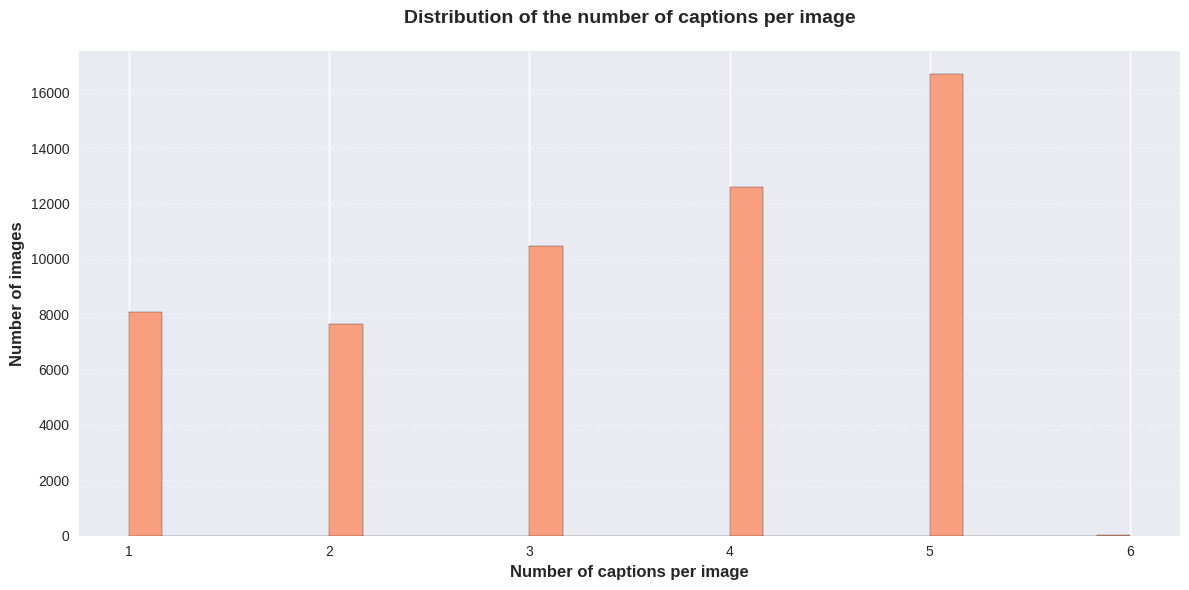

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(captions_per_image['num_captions'], bins=30, 
                           color='coral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of captions per image', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of images', fontsize=12, fontweight='bold')
ax.set_title('Distribution of the number of captions per image', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


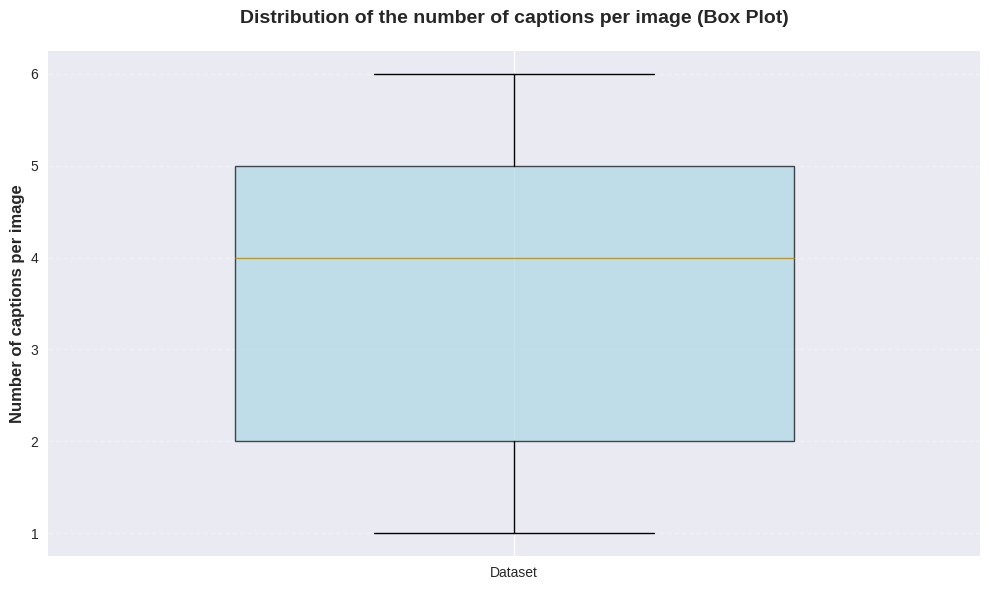

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
box_plot = ax.boxplot(captions_per_image['num_captions'], vert=True, 
                      patch_artist=True, widths=0.6)
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][0].set_alpha(0.7)
ax.set_ylabel('Number of captions per image', fontsize=12, fontweight='bold')
ax.set_title('Distribution of the number of captions per image (Box Plot)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks([1], ['Dataset'])
plt.tight_layout()
plt.show()


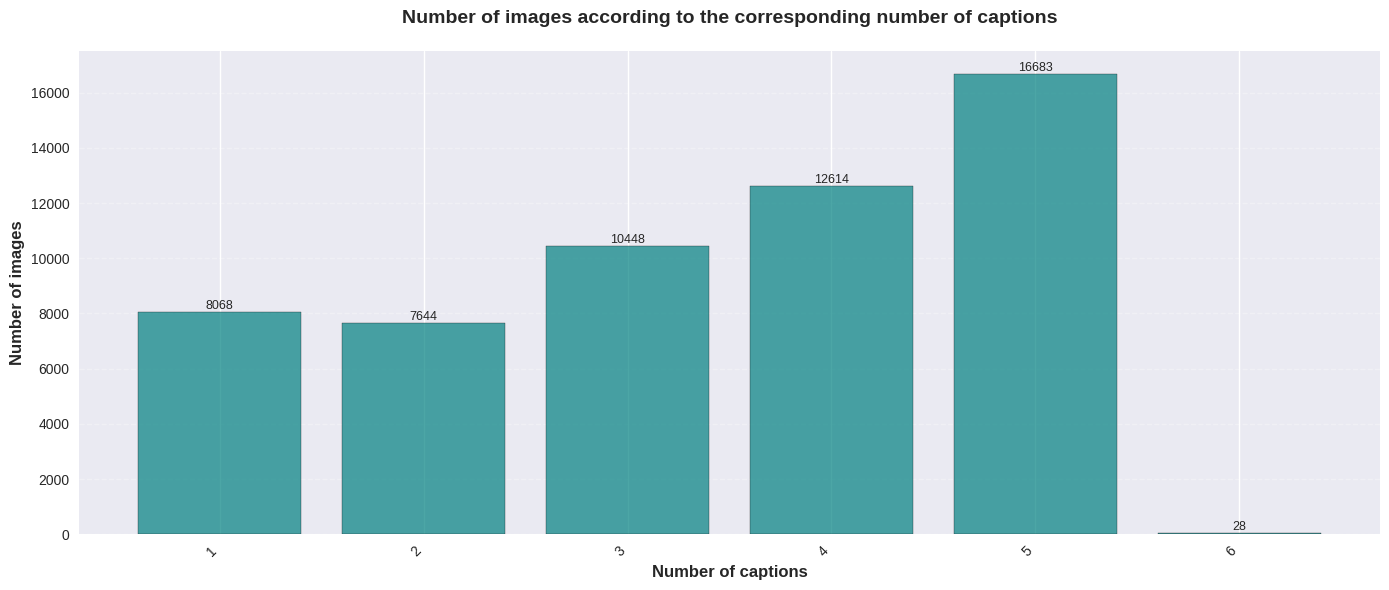

In [21]:
caption_counts = captions_per_image['num_captions'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(caption_counts.index.astype(str), caption_counts.values, 
              color='teal', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of captions', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of images', fontsize=12, fontweight='bold')
ax.set_title('Number of images according to the corresponding number of captions', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Thêm nhãn số trên mỗi cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
from python_rdrsegmenter import load_segmenter

segmenter = load_segmenter()

In [37]:
import json
import os
from tqdm import tqdm

# Hàm để segment text và nối các từ bằng dấu gạch dưới
def segment_text(text):
    """
    Segment Vietnamese text và nối các từ bằng dấu gạch dưới
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Segment text (trả về string với các từ cách nhau bởi khoảng trắng)
    segmented = segmenter.tokenize(text)
    # Thay thế khoảng trắng bằng dấu gạch dưới
    return "".join(segmented)

# Tạo dictionary với segmented captions
segmented_dict = {}

print("Đang segment các caption...")
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing"):
    image = row['image']
    caption = row['caption']
    language = row['language']
    
    # Chỉ segment các caption tiếng Việt
    if language == 'vi':
        segmented_caption = segment_text(caption)
        
        # Thêm vào dictionary
        if image not in segmented_dict:
            segmented_dict[image] = {
                'original_captions': [],
                'segmented_captions': []
            }
        
        segmented_dict[image]['original_captions'].append(caption)
        segmented_dict[image]['segmented_captions'].append(segmented_caption)

print(f"\nĐã xử lý {len(segmented_dict)} ảnh")
print(f"Tổng số caption đã segment: {sum(len(v['segmented_captions']) for v in segmented_dict.values())}")


Đang segment các caption...


Processing: 100%|██████████| 188739/188739 [00:24<00:00, 7763.54it/s]


Đã xử lý 55485 ảnh
Tổng số caption đã segment: 188739


In [38]:
# Xem ví dụ một vài kết quả
print("Ví dụ kết quả segment:")
for i, (image, data) in enumerate(list(segmented_dict.items())[:3]):
    print(f"\nẢnh: {image}")
    print(f"Số caption: {len(data['original_captions'])}")
    for orig, seg in zip(data['original_captions'][:2], data['segmented_captions'][:2]):
        print(f"  Original: {orig}")
        print(f"  Segmented: {seg}")
        print()


Ví dụ kết quả segment:

Ảnh: /kaggle/input/ktvic-dataset/ktvic_dataset/train-images/00000000002.jpg
Số caption: 5
  Original: ba chiếc thuyền đang di chuyển ở trên con sông
  Segmented: ba chiếc thuyền đang di_chuyển ở trên con sông

  Original: có ba con thuyền đang di chuyển trên con sông
  Segmented: có ba con thuyền đang di_chuyển trên con sông


Ảnh: /kaggle/input/ktvic-dataset/ktvic_dataset/train-images/00000000003.jpg
Số caption: 5
  Original: người phụ nữ đang cõng một đứa trẻ trên lưng
  Segmented: người phụ_nữ đang cõng một đứa trẻ trên lưng

  Original: ở trên lưng người phụ nữ có một đứa trẻ
  Segmented: ở trên lưng người phụ_nữ có một đứa trẻ


Ảnh: /kaggle/input/ktvic-dataset/ktvic_dataset/train-images/00000000004.jpg
Số caption: 5
  Original: người phụ nữ đang nhìn vào những chiếc đèn lồng
  Segmented: người phụ_nữ đang nhìn vào những chiếc đèn_lồng

  Original: có nhiều chiếc đèn lồng trước mặt người phụ nữ
  Segmented: có nhiều chiếc đèn_lồng trước mặt người phụ_nữ



In [39]:
# Lưu dictionary vào file JSON
output_file = "human_dataset_segmented.json"

with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(segmented_dict, f, ensure_ascii=False, indent=2)

print(f"Đã lưu dictionary vào file: {output_file}")
print(f"Kích thước file: {os.path.getsize(output_file) / (1024*1024):.2f} MB")


Đã lưu dictionary vào file: human_dataset_segmented.json
Kích thước file: 39.32 MB


In [40]:
# Đọc file JSON đã segment
with open("human_dataset_segmented.json", 'r', encoding='utf-8') as f:
    segmented_data = json.load(f)

print(f"Đã đọc {len(segmented_data)} ảnh từ file JSON")


Đã đọc 55485 ảnh từ file JSON


In [41]:
from collections import Counter

# Tạo vocab từ segmented_captions
vocab_counter = Counter()

print("Đang tạo vocab từ segmented_captions...")
for image, data in tqdm(segmented_data.items(), desc="Processing"):
    segmented_captions = data.get('segmented_captions', [])
    
    # Duyệt qua từng caption
    for caption in segmented_captions:
        if caption:  # Kiểm tra caption không rỗng
            # Split caption bằng khoảng trắng để lấy các từ
            words = caption.split()
            # Đếm frequency của mỗi từ
            vocab_counter.update(words)

print(f"\nTổng số từ unique trong vocab: {len(vocab_counter)}")
print(f"Tổng số từ (bao gồm lặp lại): {sum(vocab_counter.values())}")


Đang tạo vocab từ segmented_captions...


Processing: 100%|██████████| 55485/55485 [00:00<00:00, 161604.82it/s]


Tổng số từ unique trong vocab: 8648
Tổng số từ (bao gồm lặp lại): 2112972


In [42]:
# Chuyển Counter thành dictionary
vocab_dict = dict(vocab_counter)

# Sắp xếp theo frequency giảm dần (tùy chọn, để dễ xem)
vocab_dict_sorted = dict(sorted(vocab_dict.items(), key=lambda x: x[1], reverse=True))

# Hiển thị top 20 từ phổ biến nhất
print("Top 20 từ phổ biến nhất:")
for i, (word, freq) in enumerate(list(vocab_dict_sorted.items())[:20], 1):
    print(f"{i:2d}. {word:20s} : {freq:,}")


Top 20 từ phổ biến nhất:
 1. một                  : 254,173
 2. người                : 174,701
 3. trên                 : 77,172
 4. đàn_ông              : 73,510
 5. đang                 : 67,785
 6. trong                : 39,986
 7. phụ_nữ               : 39,701
 8. với                  : 32,165
 9. và                   : 27,668
10. đứng                 : 26,280
11. ván                  : 24,955
12. chiếc                : 23,207
13. ngồi                 : 21,955
14. ở                    : 21,508
15. con                  : 21,361
16. đi                   : 20,738
17. của                  : 20,317
18. có                   : 19,593
19. cầm                  : 18,822
20. trượt                : 14,920


In [43]:
# Lưu vocab dictionary vào file JSON
vocab_output_file = "vocab_dict.json"

with open(vocab_output_file, 'w', encoding='utf-8') as f:
    json.dump(vocab_dict, f, ensure_ascii=False, indent=2)

print(f"Đã lưu vocab dictionary vào file: {vocab_output_file}")
print(f"Kích thước file: {os.path.getsize(vocab_output_file) / (1024*1024):.2f} MB")
print(f"Số lượng từ trong vocab: {len(vocab_dict):,}")


Đã lưu vocab dictionary vào file: vocab_dict.json
Kích thước file: 0.14 MB
Số lượng từ trong vocab: 8,648


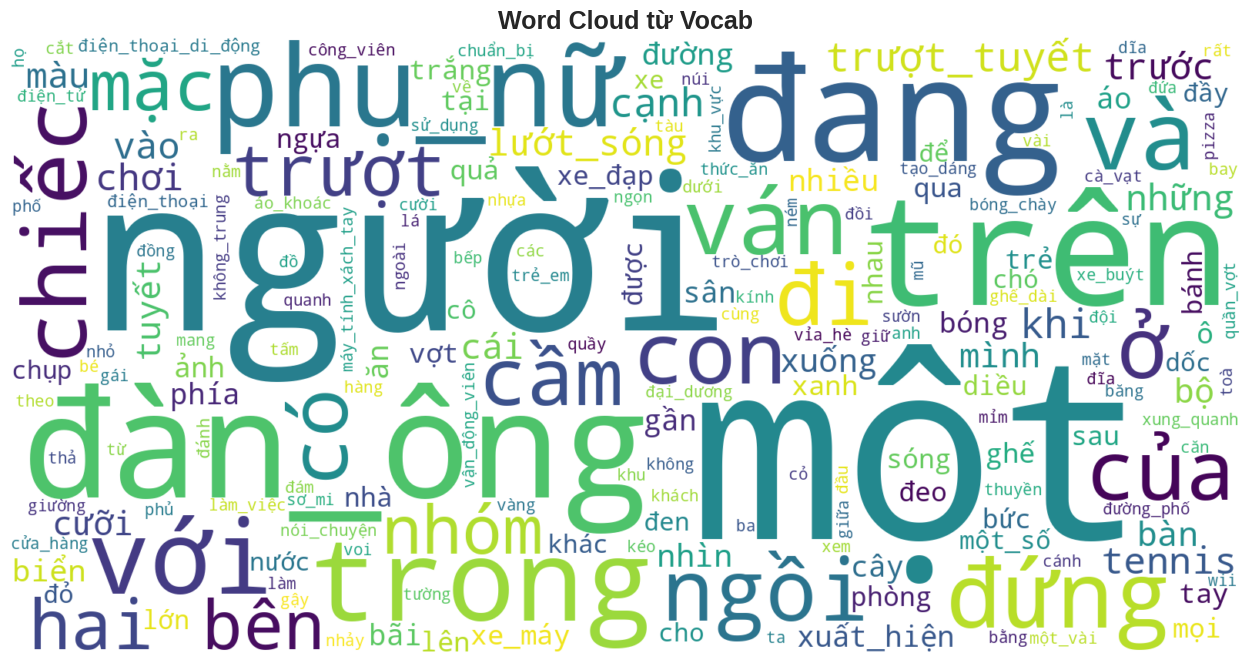

In [44]:
from wordcloud import WordCloud

# Tạo wordcloud từ vocab_dict
wordcloud = WordCloud(width=1600,
                      height=800,
                      background_color='white',
                      collocations=False,
                      font_path=None
                     ).generate_from_frequencies(vocab_dict)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud từ Vocab', fontsize=18, fontweight='bold')
plt.show()
